In [1]:
mpg<-read.table("auto-mpg.txt",col.names = c("mpg","cylinders","displacement","horsepower","weight","acceleration","year","origin","name"),colClasses = c("numeric","integer","numeric","numeric","numeric","numeric","integer","factor","character"),na.strings = "?")

In [2]:
mpg$lp100km<-100/mpg$mpg*0.621371192*3.78541178
mpg<-mpg[c(1,10,2:9)]
head(mpg)
summary(mpg)

mpg,lp100km,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<chr>
18,13.06748,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,15.68097,8,350,165,3693,11.5,70,1,buick skylark 320
18,13.06748,8,318,150,3436,11.0,70,1,plymouth satellite
16,14.70091,8,304,150,3433,12.0,70,1,amc rebel sst
17,13.83615,8,302,140,3449,10.5,70,1,ford torino
15,15.68097,8,429,198,4341,10.0,70,1,ford galaxie 500


      mpg           lp100km         cylinders      displacement  
 Min.   : 9.00   Min.   : 5.048   Min.   :3.000   Min.   : 68.0  
 1st Qu.:17.50   1st Qu.: 8.111   1st Qu.:4.000   1st Qu.:104.2  
 Median :23.00   Median :10.227   Median :4.000   Median :148.5  
 Mean   :23.51   Mean   :11.213   Mean   :5.455   Mean   :193.4  
 3rd Qu.:29.00   3rd Qu.:13.441   3rd Qu.:8.000   3rd Qu.:262.0  
 Max.   :46.60   Max.   :26.135   Max.   :8.000   Max.   :455.0  
                                                                 
   horsepower        weight      acceleration        year       origin 
 Min.   : 46.0   Min.   :1613   Min.   : 8.00   Min.   :70.00   1:249  
 1st Qu.: 75.0   1st Qu.:2224   1st Qu.:13.82   1st Qu.:73.00   2: 70  
 Median : 93.5   Median :2804   Median :15.50   Median :76.00   3: 79  
 Mean   :104.5   Mean   :2970   Mean   :15.57   Mean   :76.01          
 3rd Qu.:126.0   3rd Qu.:3608   3rd Qu.:17.18   3rd Qu.:79.00          
 Max.   :230.0   Max.   :5140   Max.   :

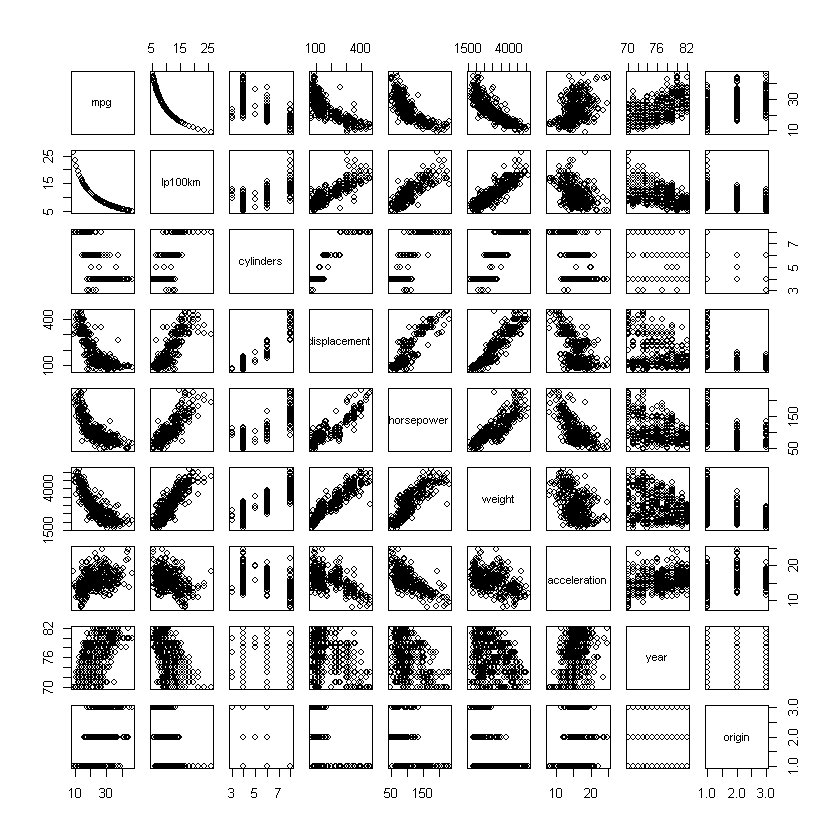

In [3]:
pairs(mpg[,1:9])

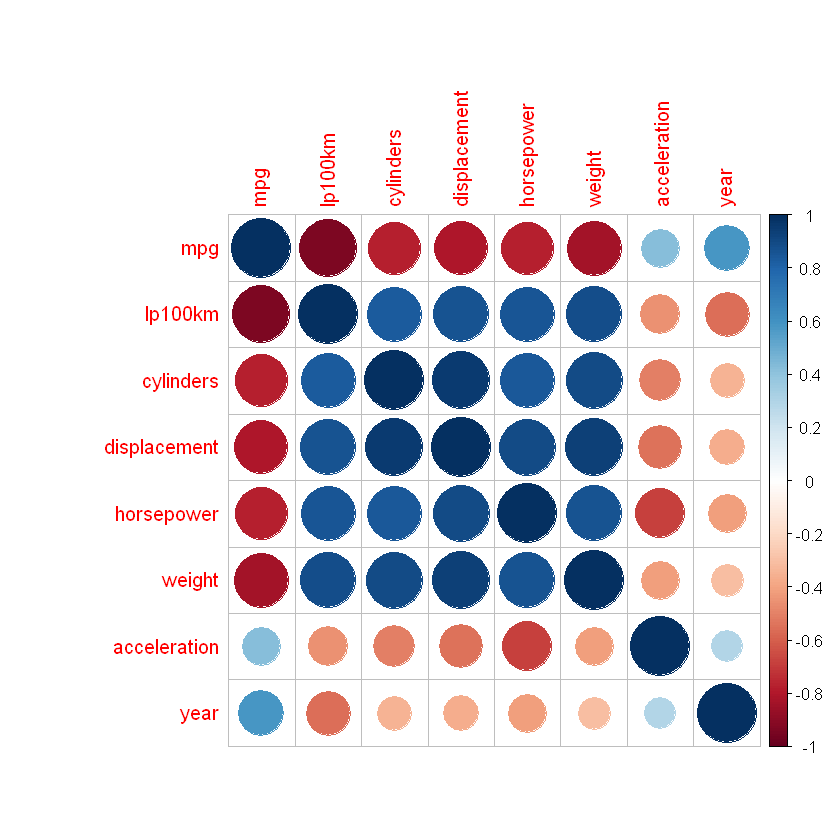

In [4]:
corrplot::corrplot(cor(na.omit(mpg[,1:8])))

In [5]:
summary(lm(lp100km~displacement+weight,data=mpg))


Call:
lm(formula = lp100km ~ displacement + weight, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2719 -1.0895 -0.0640  0.9312  8.8176 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.8377172  0.4750406   1.763   0.0786 .  
displacement 0.0117821  0.0023574   4.998 8.73e-07 ***
weight       0.0027257  0.0002903   9.390  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.765 on 395 degrees of freedom
Multiple R-squared:  0.7965,	Adjusted R-squared:  0.7955 
F-statistic: 772.9 on 2 and 395 DF,  p-value: < 2.2e-16
